In [108]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [109]:
pwd

'/content/drive/My Drive/cs/cs133/project_folder'

In [110]:
cd '/content/drive/MyDrive/cs/cs133/project_folder'

/content/drive/MyDrive/cs/cs133/project_folder


In [111]:
pwd

'/content/drive/MyDrive/cs/cs133/project_folder'

## import here

In [294]:
from collections import Counter
import pandas as pd
import os
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [113]:
apple_stock_data_path = '/content/drive/MyDrive/cs/cs133/project_folder/dataset/apple_stock.csv'
apple_twitter_data_path = '/content/drive/MyDrive/cs/cs133/project_folder/dataset/apple-twitter-sentiment-texts.csv'

In [114]:
twit = pd.read_csv(apple_twitter_data_path)
twit

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0
...,...,...
1625,Those** PICK UP THE SLACK YOU FUCK BOYS @Apple,-1
1626,Finally got my iPhone 6 in the mail and it com...,-1
1627,@umo_games @Apple ended up getting a new compu...,0
1628,The 19-Year-Old #WizKid Who Turned Down @Apple...,0


In [115]:
all_text = ' '.join(twit['text'].astype(str).tolist())
all_text

"Wow. Yall needa step it up @Apple RT @heynyla: Music and snapchat at the same damn time. Thank you #Note4 What Happened To Apple Inc?   http://t.co/FJEXI3oP0U  #aapl #apple @MoneyPress http://t.co/wXKmmTMArW Thank u @apple I can now compile all of the pics that i communicate with in one place http://t.co/tq1lo09oyA The oddly uplifting story of the Apple co-founder who sold his stake for $800 \r\n$AAPL #aapl\r\nhttp://t.co/CiZbVR05PJ @apple can i exchange my iphone for a different color lmao  i changed my mind RT @JPDesloges: Apple Acted Unfairly In Suppressing Digital Music Competition: Paul Kedrosky $AAPL #aapl\r\nhttp://t.co/XTbFhpbYf7 Let's not forget that press effects stock @Apple to Defend Against iPod Antitrust Suit http://t.co/pqJ0bKIMb8 Apple Inc. Deleted Songs From Rival Services From iPods http://t.co/dQwDFpcc4x #AAPL @TeamCavuto @Apple They're staging a die in ar an Apple store while being on their iPhone. Happy Monday! My camera on my fancy @Apple #iPhone6Plus suddenly st

In [260]:
words = all_text.split()
# words
len(words)

23668

In [261]:
words = Counter(words)
# words
len(words)

7660

In [259]:
for i, (word, count) in enumerate(words.most_common(20), 1):
  print("  {}. '{}': {:1d}".format(i, word, count))

  1. '@Apple': 552
  2. '@apple': 550
  3. 'to': 462
  4. 'the': 416
  5. 'a': 272
  6. 'I': 257
  7. 'and': 230
  8. 'in': 228
  9. 'my': 228
  10. 'is': 218
  11. 'Apple': 214
  12. 'for': 212
  13. 'of': 203
  14. 'on': 199
  15. '#aapl': 197
  16. 'you': 167
  17. 'RT': 159
  18. 'it': 150
  19. '#AAPL': 149
  20. 'with': 121


In [262]:
word_to_idx = {word: idx for idx, (word, count) in enumerate(words.most_common())}
# word_to_idx

In [263]:
idx_to_word = {idx: word for word, idx in word_to_idx.items()}
# idx_to_word

In [264]:
print(word_to_idx['@'])

858


In [265]:
word_dictionary = pd.DataFrame([
    {'word': word, 'index': idx, 'count': words[word]}
    for word, idx in sorted(word_to_idx.items(), key=lambda x: x[1])
])
word_dictionary

,word,index,count
0,@Apple,0,552
1,@apple,1,550
2,to,2,462
3,the,3,416
4,a,4,272
...,...,...,...
7655,http://t.co/PoqfGOeVSU,7655,1
7656,Longer,7656,1
7657,Cycle,7657,1
7658,Unit,7658,1


In [123]:
word_dictionary.to_csv('word_dictionary.csv', index = False)

In [124]:
ls

apple_stock_analysis.ipynb  iphone14-query-tweets.csv  word_dictionary.csv
dataset/                    word_breaker.ipynb


In [125]:
df = pd.read_csv('word_dictionary.csv')
df

,word,index,count
0,@Apple,0,552
1,@apple,1,550
2,to,2,462
3,the,3,416
4,a,4,272
...,...,...,...
7655,http://t.co/PoqfGOeVSU,7655,1
7656,Longer,7656,1
7657,Cycle,7657,1
7658,Unit,7658,1


In [266]:
word_check = '@apple'
index = 1
if word_check in word_to_idx:
  print('word is:', idx_to_word[index], 'index is:', word_to_idx[word_check], 'fequency is:', words[word_check])

word is: @apple index is: 1 fequency is: 550


#New twit dataset with date

In [142]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tleonel/iphone14-tweets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iphone14-tweets' dataset.
Path to dataset files: /kaggle/input/iphone14-tweets


In [143]:
target_dir = "/content/drive/MyDrive/cs/cs133/project_folder"

os.makedirs(target_dir, exist_ok=True)

for fname in os.listdir(path):
    src = os.path.join(path, fname)
    dst = os.path.join(target_dir, fname)
    !cp "{src}" "{dst}"


In [144]:
ls

apple_stock_analysis.ipynb  iphone14-query-tweets.csv  word_dictionary.csv
dataset/                    word_breaker.ipynb


In [279]:
apple_twit_path = '/content/drive/MyDrive/cs/cs133/project_folder/dataset/apple-twitter-sentiment-texts.csv'
twit = pd.read_csv(apple_twit_path)
iphone_twit_path = '/content/drive/MyDrive/cs/cs133/project_folder/iphone14-query-tweets.csv'
iphone = pd.read_csv(iphone_twit_path)

# twit.head()
iphone.head()

,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:29+00:00,TheAppleGang101,NaN,A new account dedicated to all of the latest l...,False,10,28,0,0,0,"<a href=""http://twitter.com/#!/download/ipad"" ...",iPhone SE 3 gets more expensive in the UK afte...
1,2022-09-08 22:49:27+00:00,TheJessicats,1999,Tweet like nobody’s reading • standup comedian...,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
2,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,👨🏽‍💻💳🎫✈️,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
3,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,Preferring to be the dumbest person in the roo...,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
4,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,Father of 3. Follower of Christ. Lover of all ...,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...


In [280]:
def clean_text(s):
    s = str(s)
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"@\w+", "", s)
    s = re.sub(r"#", "", s)
    s = re.sub(r"[^A-Za-z0-9\s']", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip().lower()

In [283]:
twit['clean_text'] = twit['text'].apply(clean_text)
iphone['clean_text'] = iphone['tweet_text'].apply(clean_text)

In [293]:
twit['clean_text'].info()
twit['clean_text'].head()

<class 'pandas.core.series.Series'>
RangeIndex: 1630 entries, 0 to 1629
Series name: clean_text
Non-Null Count  Dtype 
--------------  ----- 
1630 non-null   object
dtypes: object(1)
memory usage: 12.9+ KB


,clean_text
0,wow yall needa step it up rt music and snapcha...
1,what happened to apple inc aapl apple
2,thank u i can now compile all of the pics that...
3,the oddly uplifting story of the apple co foun...
4,can i exchange my iphone for a different color...


In [289]:
iphone['clean_text'].info()
iphone['clean_text'].head()

<class 'pandas.core.series.Series'>
RangeIndex: 144245 entries, 0 to 144244
Series name: clean_text
Non-Null Count   Dtype 
--------------   ----- 
144245 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


,clean_text
0,iphone se 3 gets more expensive in the uk afte...
1,i hope it happens before my iphone 14 arrives
2,nah iphone 14 upgrade just not it change my mind
3,to the shock of absolutely no one apple ready ...
4,will you be able to order the iphone 14 pro on...


In [295]:
X = twit['clean_text']
y = twit['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.9,
    ngram_range=(1,2)
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=2000, multi_class='ovr')
clf.fit(X_train_vec, y_train)

print(classification_report(y_test, clf.predict(X_test_vec)))

              precision    recall  f1-score   support

          -1       0.77      0.82      0.80       137
           0       0.77      0.86      0.81       160
           1       1.00      0.10      0.19        29

    accuracy                           0.78       326
   macro avg       0.85      0.59      0.60       326
weighted avg       0.79      0.78      0.75       326



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [313]:
feature_names = vectorizer.get_feature_names_out()
classes = clf.classes_
coefs = clf.coef_

top_k = 100

pos_word = set()
neg_word = set()
neu_word = set()

for label, coef in zip(classes, coefs):
    top_idx = coef.argsort()[-top_k:]
    top_words = [feature_names[i] for i in top_idx]

    if label == 1:
        pos_word.update(top_words)
    elif label == -1:
        neg_word.update(top_words)
    else:  # label == 0
        neu_word.update(top_words)

print("positive words:", list(pos_word)[:10])
print("negative words:", list(neg_word)[:10])
print("neutral words:", list(neu_word)[:10])

positive words: ['by the', 'to for', 'with my', 'here', 'but', 'awesome', 'watches', 'of your', 'at the', 'best']
negative words: ['gets', 'phones', 'ipods', 'useless', 'are', 'didn', 'hold', 'even', 'chargers', 'still']
neutral words: ['blog aapl', 'know', 'if', 'target', 'trading', 'stage', 'for apple', 'via', 'apple inc', 'hiring']


In [317]:
word_ml = {}
for w in neu_word:
    word_ml[w] = 0
for w in neg_word:
    word_ml[w] = -1
for w in pos_word:
    word_ml[w] = 1

# word_ml
list(word_ml.items())[:10]

[('blog aapl', 0),
 ('know', 0),
 ('if', 0),
 ('target', 0),
 ('trading', 0),
 ('stage', 0),
 ('for apple', 0),
 ('via', 0),
 ('apple inc', 0),
 ('hiring', 0)]

In [322]:
iphone['datetime'] = pd.to_datetime(iphone['date_time'])
iphone['date'] = iphone['datetime'].dt.date
iphone['weekday'] = iphone['datetime'].dt.day_name()
iphone['month'] = iphone['datetime'].dt.month
iphone['tokens'] = iphone['clean_text'].str.split()
iphone['tokens'].head()

,tokens
0,"[iphone, se, 3, gets, more, expensive, in, the..."
1,"[i, hope, it, happens, before, my, iphone, 14,..."
2,"[nah, iphone, 14, upgrade, just, not, it, chan..."
3,"[to, the, shock, of, absolutely, no, one, appl..."
4,"[will, you, be, able, to, order, the, iphone, ..."


In [323]:
def tweet_ml_score(tokens):
    scores = [word_ml.get(w, 0) for w in tokens]
    if not scores:
        return 0
    return float(np.mean(scores))

In [ ]:
def count_ml_words(tokens):
    pos = neg = neu = 0
    for w in tokens:
        label = word_ml.get(w, 0)
        if label == 1:
            pos += 1
        elif label == -1:
            neg += 1
        else:
            neu += 1
    return pd.Series({'pos_words': pos, 'neg_words': neg, 'neu_words': neu})


In [325]:
iphone['ml_score'] = iphone['tokens'].apply(tweet_ml_score)
iphone[['pos_words','neg_words','neu_words']] = iphone['tokens'].apply(count_ml_words)

In [327]:
iphone[['date_time','tweet_text','ml_score']].head()

,date_time,tweet_text,ml_score
0,2022-09-08 22:49:29+00:00,iPhone SE 3 gets more expensive in the UK afte...,0.142857
1,2022-09-08 22:49:27+00:00,@Travon I hope it happens before my iPhone 14 ...,-0.222222
2,2022-09-08 22:49:16+00:00,"Nah iphone 14 upgrade just not it, change my m...",-0.400000
3,2022-09-08 22:49:09+00:00,To the shock of absolutely no one: \n\nApple: ...,0.069767
4,2022-09-08 22:49:09+00:00,@TMobile @TMobileHelp will you be able to orde...,0.066667


In [330]:
daily_ml = (
    iphone.groupby('date')
          .agg(
              pos_words=('pos_words','sum'),
              neg_words=('neg_words','sum'),
              neu_words=('neu_words','sum'),
              mean_ml=('ml_score','mean'),
              n_tweets=('ml_score','count')
          )
          .reset_index()
)
daily_ml.head()

,date,pos_words,neg_words,neu_words,mean_ml,n_tweets
0,2022-07-11,362,221,2485,0.044808,174
1,2022-07-12,751,461,5811,0.044896,391
2,2022-07-13,548,406,4817,0.022593,365
3,2022-07-14,1160,711,9257,0.035228,680
4,2022-07-15,1096,635,7976,0.038709,559


In [331]:
daily_ml['date'] = pd.to_datetime(daily_ml['date'])
start = '2022-08-29' # monday
end = '2022-09-02' # friday


In [332]:
week_ml = daily_ml[(daily_ml['date'] >= start) & (daily_ml['date'] <= end)].sort_values('date')
week_ml

,date,pos_words,neg_words,neu_words,mean_ml,n_tweets
49,2022-08-29,3310,1865,27155,0.038840,1846
50,2022-08-30,3865,2291,32718,0.034119,2215
51,2022-08-31,5507,3323,39152,0.046946,2902
52,2022-09-01,7193,4000,50635,0.047305,3633
53,2022-09-02,6104,3457,39780,0.050127,2965


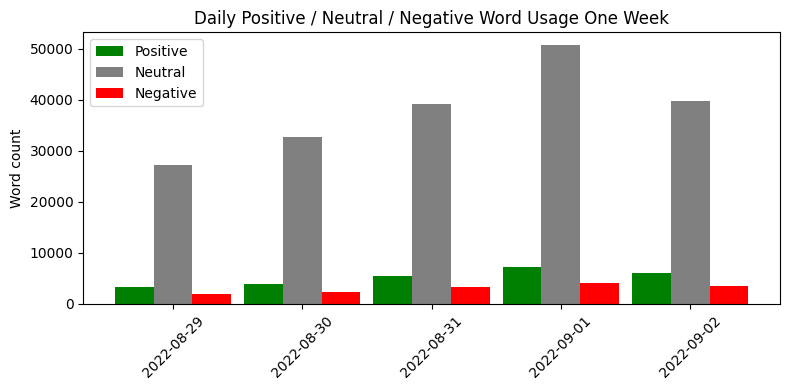

In [336]:
x = np.arange(len(week_ml))
width = 0.3

plt.figure(figsize=(8,4))
plt.bar(x - width, week_ml['pos_words'], width=width, label='Positive', color='green')
plt.bar(x,         week_ml['neu_words'], width=width, label='Neutral',  color='gray')
plt.bar(x + width, week_ml['neg_words'], width=width, label='Negative', color='red')

plt.xticks(x, week_ml['date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.ylabel('Word count')
plt.title('Daily Positive / Neutral / Negative Word Usage One Week')
plt.legend()
plt.tight_layout()
plt.show()
